## Rasampling paper 

https://nbviewer.jupyter.org/gist/jthiem/0bb8b2296c8dbd0b83bfab8270a8eb24


### Extract acoustic features, scipy.io wavfile

In [3]:
import scipy.io.wavfile as wav
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

%matplotlib  inline

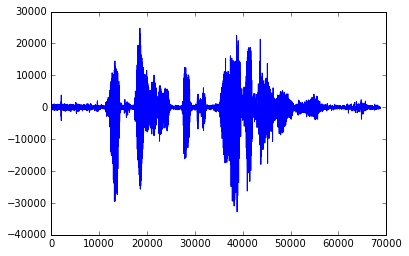

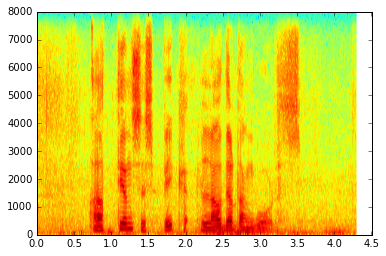

In [4]:
rate, audio = wav.read('D_1000001.wav')
plt.plot(audio)
plt.show()

plt.specgram(x = audio, Fs = rate)
plt.show()

In [5]:
# specrgam parameters (not use)

f, t_S, Sxx = signal.spectrogram(audio, rate)

print f.shape, t_S.shape, Sxx.shape

(129L,) (306L,) (129L, 306L)


### Plot number of samples

In [6]:
rate,o1 = wav.read('D_1000001.wav')
rate,o2 = wav.read('D_1000002.wav')
rate,o3 = wav.read('D_1000003.wav')

rate,s1 = wav.read('D_1001708.wav')
rate,s2 = wav.read('D_1001709.wav')
rate,s3 = wav.read('D_1001710.wav')

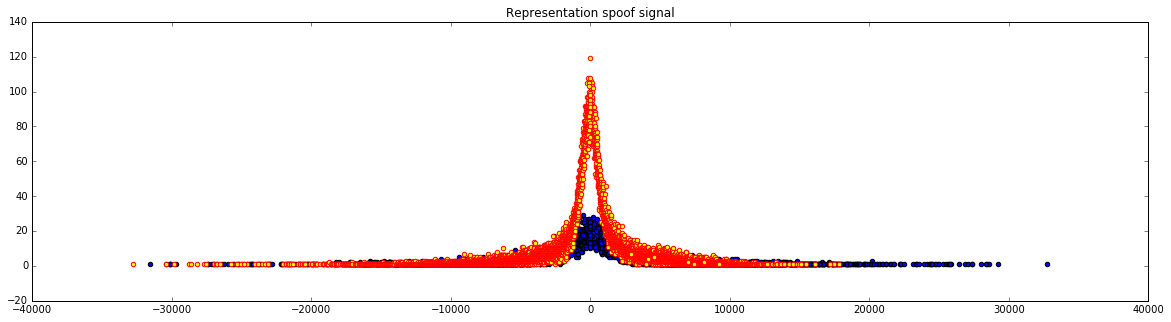

In [7]:
from collections import Counter

# spoofing speech

modelSpoof = Counter(s2)
spoofValues = list(modelSpoof.values())
spoofKeys = list(modelSpoof.keys())

# original speech

modelOriginal = Counter(o3)
originalValues = list(modelOriginal.values())
originalKeys = list(modelOriginal.keys())

plt.figure(figsize=(20,5))
plt.title('Representation spoof signal')
plt.scatter(spoofKeys, spoofValues, color= 'blue', edgecolors='black')
plt.scatter(originalKeys, originalValues,  color= 'yellow', edgecolors='red')
plt.show()

In [11]:
# проверка
print spoofKeys[:10] # ключи 
print spoofValues[:10] # значения - количество отсчетов

print modelSpoof[8192]

[0, 8192, 1091, -5461, 5, 10093, 10, 12290, 14, -9555]
[22, 3, 12, 3, 14, 1, 10, 1, 19, 1]
3


### cut on the level of 200 HZ

(34353L,)


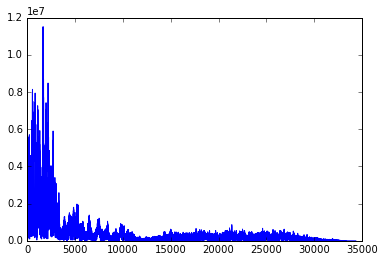

In [12]:
fft_audio =  np.abs(np.fft.rfft(audio))
print fft_audio.shape
plt.plot(fft_audio)
plt.show()
